<a href="https://colab.research.google.com/github/a01247291/Proyecto-de-MIT/blob/main/Estadisticos_Proyecto_MIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# Se importan las librerias que ayudaran a realizar el analisis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Se carga la base de datos del Shopper
file_path = '/content/drive/MyDrive/Colab Notebooks/Desarrollo de Proyectos/Proyecto MIT/Shopper Survey (MX 25)_November 26, 2025_14.33.csv'
df = pd.read_csv(file_path)

# ELIMINAR RUIDO DE ENCABEZADOS
# Eliminamos filas 0 y 1 (la descripción y los códigos de importación)
# reseteamos el índice para que empiece limpio desde 0
df_clean = df.drop([0, 1]).reset_index(drop=True)

print("Filas iniciales eliminadas. Datos restantes:", len(df_clean))

Filas iniciales eliminadas. Datos restantes: 1320


In [70]:
# ---FILTRAR Y LIMPIAR COLUMNAS ---

# Filtramos para quedarnos solo con encuestas terminadas
df_clean = df_clean[df_clean['Finished'] == 'True']

# Seleccionamos solo las columnas de interés
df_subset = df_clean[['Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q16', 'Q17']].copy()

# Renombrar
df_subset.columns = ['Precio', 'Sabor', 'Salud', 'Disponibilidad', 'Edad', 'Sexo']

# UNIFICAR EDADES (LIMPIEZA DE RUIDO)
correccion_edad = {
    '1': 'Under 20',
    '2': '20–29',
    '3': '30-39',
    '4': '40-49',
    '5': '50-59',
    '6': '60-69',
    '7': '70 and over'
}
df_subset['Edad'] = df_subset['Edad'].replace(correccion_edad)

# Verificar
print("Filas restantes (encuestas terminadas):", len(df_subset))
print("Categorías de Edad unificadas:", df_subset['Edad'].unique())

Filas restantes (encuestas terminadas): 1135
Categorías de Edad unificadas: ['20–29' '40-49' '30-39' '50-59' '70 and over' '60-69' 'Under 20']


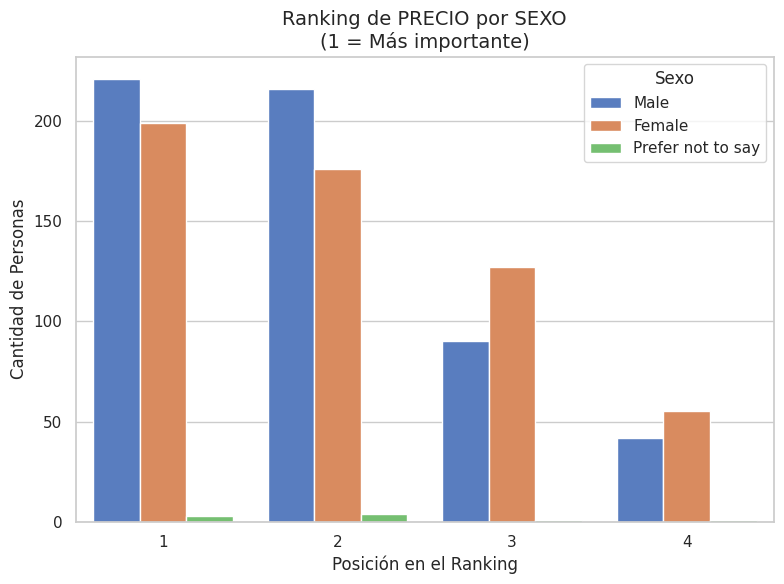

----------------------------------------------------------------------------------------------------


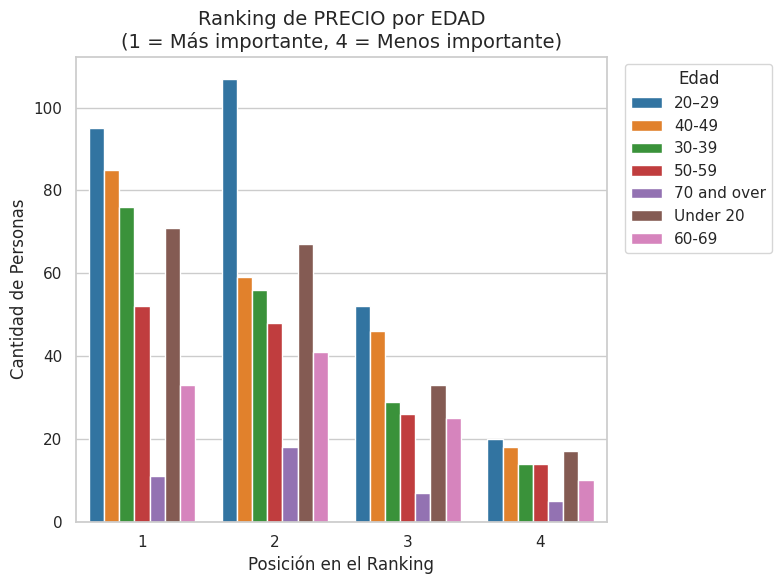

----------------------------------------------------------------------------------------------------


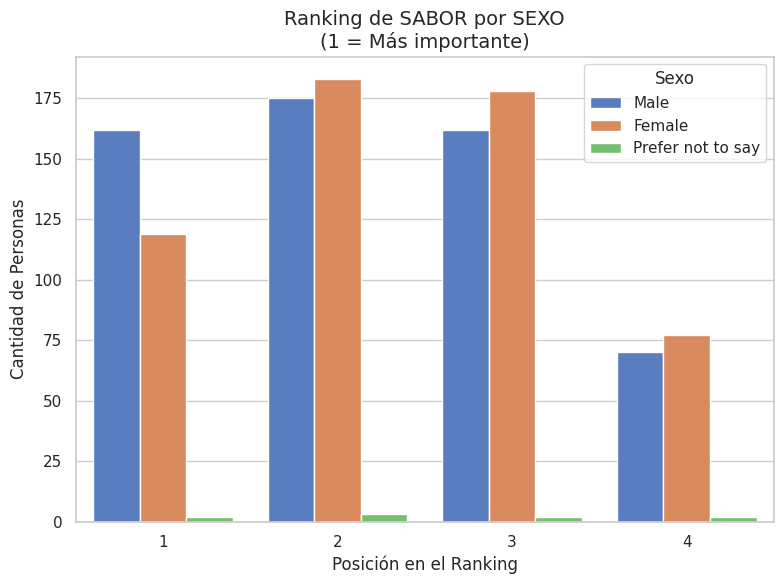

----------------------------------------------------------------------------------------------------


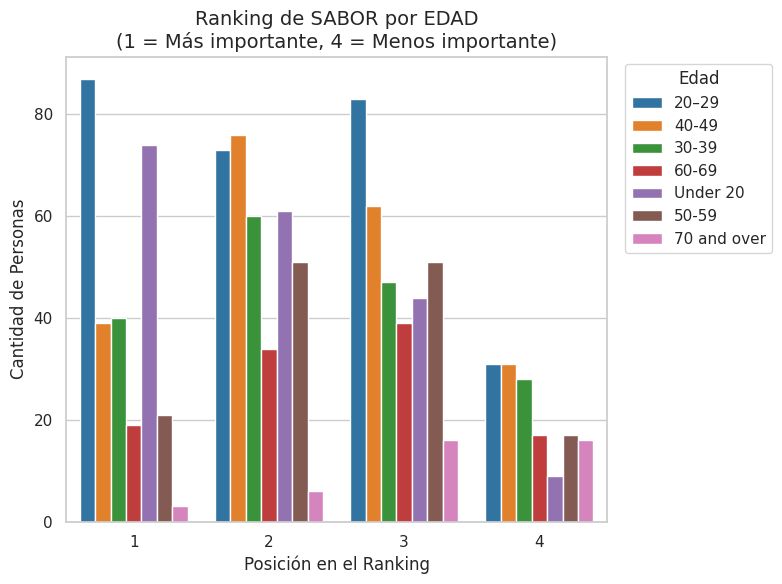

----------------------------------------------------------------------------------------------------


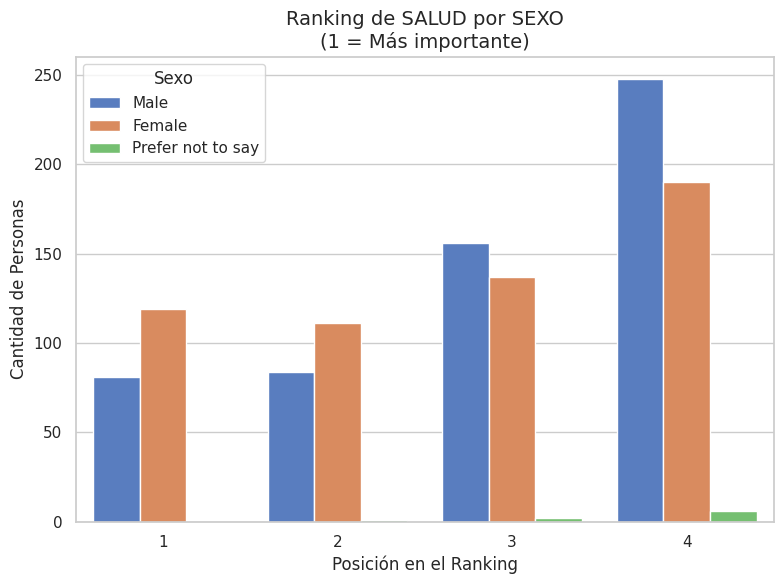

----------------------------------------------------------------------------------------------------


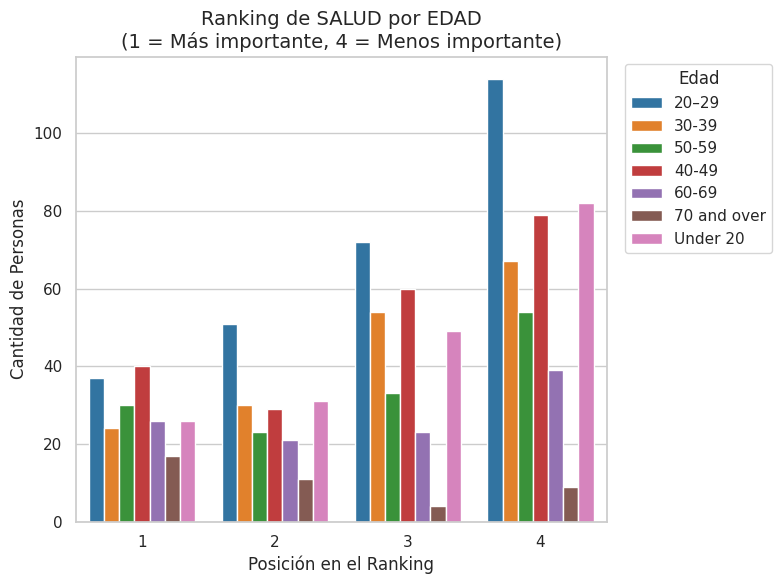

----------------------------------------------------------------------------------------------------


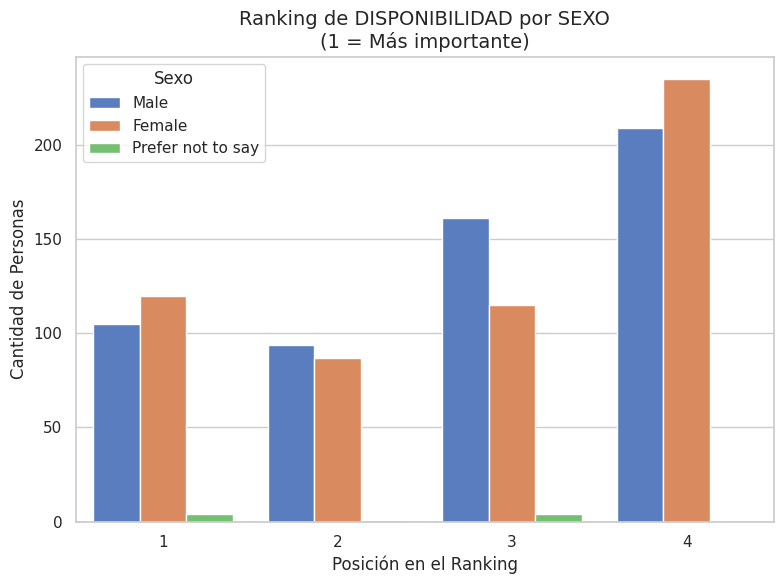

----------------------------------------------------------------------------------------------------


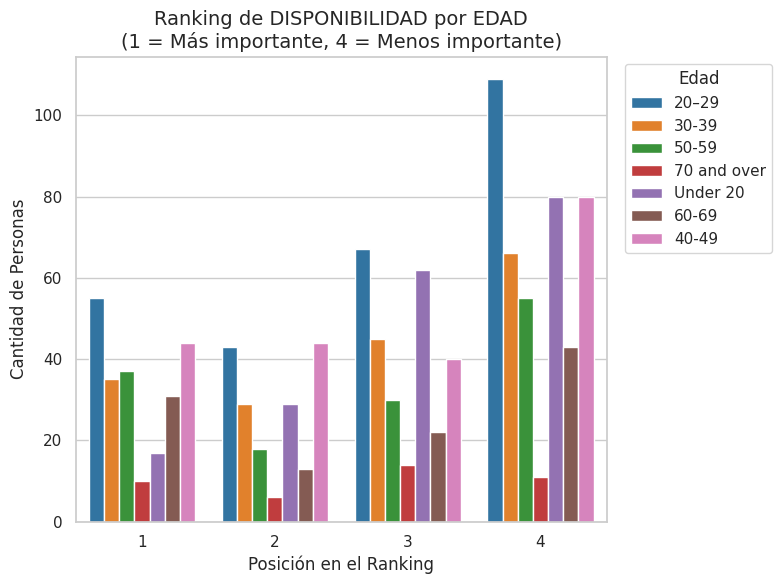

----------------------------------------------------------------------------------------------------


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---CONVERTIR Y PREPARAR ---
cols_num = ['Precio', 'Sabor', 'Salud', 'Disponibilidad']

# Aseguramos que sean numéricos
for col in cols_num:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')

# Eliminamos filas vacías
df_subset = df_subset.dropna()

# Transformar tabla (Melt)
df_melted = df_subset.melt(id_vars=['Edad', 'Sexo'],
                           value_vars=cols_num,
                           var_name='Atributo',
                           value_name='Ranking')

# --- 2. GENERAR GRAFICAS ---
sns.set_theme(style="whitegrid")

# Vamos a recorrer cada atributo uno por uno
for atributo in cols_num:

    # Filtramos los datos solo para el atributo actual (ej. solo 'Precio')
    data_temp = df_melted[df_melted['Atributo'] == atributo]

    # --- A) GRÁFICO POR SEXO ---
    plt.figure(figsize=(8, 6)) # Crea una figura nueva vacía
    sns.countplot(
        data=data_temp,
        x="Ranking",
        hue="Sexo",
        palette="muted"
    )
    plt.title(f'Ranking de {atributo.upper()} por SEXO\n(1 = Más importante)', fontsize=14)
    plt.ylabel('Cantidad de Personas')
    plt.xlabel('Posición en el Ranking')
    plt.legend(title='Sexo')
    plt.tight_layout()
    plt.show() # Muestra la gráfica y cierra la figura para empezar la siguiente

    print("-" * 100)

    # --- B) GRÁFICO POR EDAD ---
    plt.figure(figsize=(8, 6)) # Un poco más ancha para que quepa la leyenda de edad
    sns.countplot(
        data=data_temp,
        x="Ranking",
        hue="Edad",
        palette="tab10"
    )
    plt.title(f'Ranking de {atributo.upper()} por EDAD\n(1 = Más importante, 4 = Menos importante)', fontsize=14)
    plt.ylabel('Cantidad de Personas')
    plt.xlabel('Posición en el Ranking')
    plt.legend(title='Edad', bbox_to_anchor=(1.02, 1), loc='upper left') # Leyenda afuera
    plt.tight_layout()
    plt.show()

    print("-" * 100) # Separador visual

In [72]:
import pandas as pd

# 1. Cargar
file_path = '/content/drive/MyDrive/Colab Notebooks/Desarrollo de Proyectos/Proyecto MIT/Shopper Survey (MX 25)_November 26, 2025_14.33.csv'
df = pd.read_csv(file_path)

# 2. Limpiar filas basura
df_clean = df.drop([0, 1]).reset_index(drop=True)

# 3. Seleccionar y Renombrar
df_subset = df_clean[['Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q16', 'Q17']].copy()
df_subset.columns = ['Precio', 'Sabor', 'Salud', 'Disponibilidad', 'Edad', 'Sexo']

# 4. Corregir Edad
mapa_edades = {
    '1': 'Under 20', '2': '20–29', '3': '30-39',
    '4': '40-49', '5': '50-59', '6': '60-69', '7': '70 and over'
}
df_subset['Edad'] = df_subset['Edad'].replace(mapa_edades)

# 5. Convertir Rankings a números
cols_num = ['Precio', 'Sabor', 'Salud', 'Disponibilidad']
for col in cols_num:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')

# 6. Quitar vacíos
df_subset = df_subset.dropna()

# --- ESTA LÍNEA ES LA QUE TE MUESTRA LA TABLA ---
print("Tabla limpia (Primeras 10 filas):")
display(df_subset.head(10))  # 'display' funciona mejor en Colab que 'print'

print("\nTipos de datos correctos:")
print(df_subset.info())

Tabla limpia (Primeras 10 filas):


,Precio,Sabor,Salud,Disponibilidad,Edad,Sexo
0,1.0,3.0,4.0,2.0,20–29,Male
1,2.0,4.0,3.0,1.0,20–29,Male
2,1.0,2.0,4.0,3.0,40-49,Female
3,1.0,3.0,2.0,4.0,30-39,Male
7,2.0,3.0,4.0,1.0,20–29,Male
8,3.0,1.0,2.0,4.0,20–29,Male
9,3.0,1.0,4.0,2.0,20–29,Male
10,2.0,1.0,3.0,4.0,20–29,Female
11,2.0,3.0,4.0,1.0,30-39,Female
12,4.0,2.0,3.0,1.0,20–29,Female



Tipos de datos correctos:
<class 'pandas.core.frame.DataFrame'>
Index: 1135 entries, 0 to 1316
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Precio          1135 non-null   float64
 1   Sabor           1135 non-null   float64
 2   Salud           1135 non-null   float64
 3   Disponibilidad  1135 non-null   float64
 4   Edad            1135 non-null   object 
 5   Sexo            1135 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.1+ KB
None


In [73]:
# --- CREAR COLUMNAS DUMMY PARA SEXO ---

# Usamos la base limpia que ya tienes.
# Si tu variable se llama 'df_subset', usa esa.
# Aquí asumimos que tienes las columnas 'Sexo' y 'Edad'.

# 1. Crear columna 'Hombre'
# Pone un 1 si Sexo es 'Male', de lo contrario pone 0
df_subset['Hombre'] = (df_subset['Sexo'] == 'Male').astype(int)

# 2. Crear columna 'Mujer'
# Pone un 1 si Sexo es 'Female', de lo contrario pone 0
df_subset['Mujer'] = (df_subset['Sexo'] == 'Female').astype(int)

# --- VERIFICACIÓN ---
# Vamos a ver si funcionó correctamente con los casos "Prefer not to say"
print("Vista previa con las nuevas columnas:")
# Mostramos: un Hombre, una Mujer y alguien que no especificó (si existe)
cols_ver = ['Sexo', 'Hombre', 'Mujer']

# Buscamos ejemplos para mostrarte
ej_hombre = df_subset[df_subset['Sexo'] == 'Male'].head(1)
ej_mujer = df_subset[df_subset['Sexo'] == 'Female'].head(1)
ej_otro = df_subset[~df_subset['Sexo'].isin(['Male', 'Female'])].head(1)

display(pd.concat([ej_hombre, ej_mujer, ej_otro])[cols_ver])

Vista previa con las nuevas columnas:


,Sexo,Hombre,Mujer
0,Male,1,0
2,Female,0,1
83,Prefer not to say,0,0


In [74]:
# --- CELDA NUEVA: ENTRENAMIENTO DEL MODELO ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. PARCHE DE SEGURIDAD (Arreglar guiones)
# Esto toma los datos que ya limpiaste y asegura que todos los guiones sean iguales (-)
df_subset['Edad'] = df_subset['Edad'].str.replace('–', '-', regex=False)

# 2. CONVERTIR EDAD A NÚMEROS
# Ahora sí, la computadora entenderá perfectamente los rangos
mapa_edad_numerico = {
    'Under 20': 0,
    '20-29': 1,
    '30-39': 2,
    '40-49': 3,
    '50-59': 4,
    '60-69': 5,
    '70 and over': 6
}
df_subset['Edad_Num'] = df_subset['Edad'].map(mapa_edad_numerico)

# 3. PREPARAR DATOS
# Borramos filas si quedó algún hueco (solo por seguridad)
df_final = df_subset.dropna(subset=['Edad_Num', 'Hombre', 'Mujer', 'Salud'])

# 4. ENTRENAR (FIT)
X = df_final[['Edad_Num', 'Hombre', 'Mujer']]  # Pistas
y = df_final['Salud']                           # Objetivo (1-4)

# Separamos: 80% estudiar, 20% examen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creamos el cerebro artificial
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 5. RESULTADO
precisión = accuracy_score(y_test, modelo.predict(X_test))
print(f"Modelo entrenado con éxito. Precisión: {precisión:.1%}")

# Prueba rápida: ¿Qué opina una Mujer de 20-29 años?
# Edad=1 (20-29), Hombre=0, Mujer=1
prediccion = modelo.predict([[1, 0, 1]])
print(f"Predicción para Mujer de 20-29 años (Salud): Ranking {prediccion[0]}")

Modelo entrenado con éxito. Precisión: 39.2%
Predicción para Mujer de 20-29 años (Salud): Ranking 4.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/tmp/ipython-input-3840862706.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=df_importancia, x='Peso', y='Factor', palette='viridis')


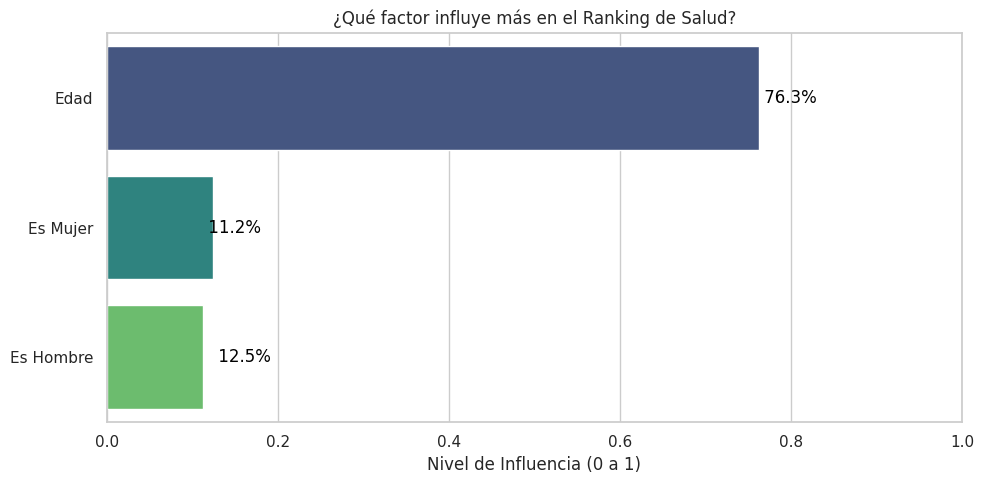

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumimos que 'modelo' ya está entrenado (si corriste el paso anterior)

# 1. Extraer la importancia de cada variable
importancias = modelo.feature_importances_
nombres_variables = ['Edad', 'Es Hombre', 'Es Mujer']

# 2. Crear una tablita ordenada
df_importancia = pd.DataFrame({
    'Factor': nombres_variables,
    'Peso': importancias
})
df_importancia = df_importancia.sort_values(by='Peso', ascending=False)

# 3. Graficar
plt.figure(figsize=(10, 5))
# Usamos barplot para barras horizontales
grafico = sns.barplot(data=df_importancia, x='Peso', y='Factor', palette='viridis')

plt.title('¿Qué factor influye más en el Ranking de Salud?')
plt.xlabel('Nivel de Influencia (0 a 1)')
plt.ylabel('')

# Ponerle numeritos a las barras para que se vea pro
for index, row in df_importancia.iterrows():
    # Escribimos el porcentaje al final de cada barra
    grafico.text(row.Peso, index, f" {row.Peso:.1%}", va='center', color='black')

plt.xlim(0, 1) # Asegurar que el eje vaya de 0 a 100%
plt.tight_layout()
plt.show()

In [76]:
# --- CALCULADORA DE PREDICCIONES ---
# Instrucciones: Cambia estos dos valores y dale Play para ver qué opina la IA.

edad_usuario = '50-59'   # Opciones: 'Under 20', '20-29', '30-39', '40-49', '50-59', '60-69', '70 and over'
sexo_usuario = 'Female'  # Opciones: 'Male', 'Female', 'Prefer not to say'

# ------------------------------------------------------------------
# NO TOQUES NADA DE AQUÍ PARA ABAJO (Es el motor de la calculadora)
# ------------------------------------------------------------------
import pandas as pd
import numpy as np

# 1. Preparamos los datos de entrada
entrada = pd.DataFrame({'Edad': [edad_usuario], 'Sexo': [sexo_usuario]})

# 2. Traducimos Edad a Número (Usando el mapa que ya aprendió el modelo)
# Nota: Si escribes mal la edad, esto puede fallar, así que úsalas tal cual están arriba.
mapa_edad = {'Under 20': 0, '20-29': 1, '30-39': 2, '40-49': 3, '50-59': 4, '60-69': 5, '70 and over': 6}
# Aseguramos compatibilidad de guiones por si acaso
entrada['Edad'] = entrada['Edad'].str.replace('–', '-', regex=False)
entrada['Edad_Num'] = entrada['Edad'].map(mapa_edad)

# 3. Traducimos Sexo a Dummies
entrada['Hombre'] = (entrada['Sexo'] == 'Male').astype(int)
entrada['Mujer'] = (entrada['Sexo'] == 'Female').astype(int)

# 4. Hacemos la predicción usando el modelo (Random Forest) que ya entrenaste
try:
    prediccion = modelo.predict(entrada[['Edad_Num', 'Hombre', 'Mujer']])
    probabilidades = modelo.predict_proba(entrada[['Edad_Num', 'Hombre', 'Mujer']])

    print(f"--- RESULTADO DE LA PREDICCIÓN ---")
    print(f"Perfil: {sexo_usuario}, {edad_usuario}")
    print(f"Ranking Predicho para Salud: {prediccion[0]}")
    print(f"(1 = Muy Importante ... 4 = Nada Importante)")

    print("\n¿Qué tan segura está la IA?")
    print(f"Probabilidad de ser Ranking 1: {probabilidades[0][0]:.1%}")
    print(f"Probabilidad de ser Ranking 2: {probabilidades[0][1]:.1%}")
    print(f"Probabilidad de ser Ranking 3: {probabilidades[0][2]:.1%}")
    print(f"Probabilidad de ser Ranking 4: {probabilidades[0][3]:.1%}")

except NameError:
    print("Error: No has entrenado el modelo 'modelo_rf' todavía. Corre el bloque de entrenamiento primero.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

--- RESULTADO DE LA PREDICCIÓN ---
Perfil: Female, 50-59
Ranking Predicho para Salud: 4.0
(1 = Muy Importante ... 4 = Nada Importante)

¿Qué tan segura está la IA?
Probabilidad de ser Ranking 1: 22.3%
Probabilidad de ser Ranking 2: 17.4%
Probabilidad de ser Ranking 3: 25.7%
Probabilidad de ser Ranking 4: 34.6%
